# Battle of Dazar'alor Guild Awards Analysis

<ul>
<li><a href="#collect">Collect Analysis Data</a></li>
<li><a href="#champion">Champion of the Light</a></li>
<li><a href="#jadefire">Jadefire Masters</a>
    <ul>
        <li><a href="#jf_interrupts">Interrupts</a></li>
        <li><a href="#multi-sided">Multi-Sided Strike</a></li>
        <li><a href="#jf_dispells">Dispells</a></li>
    </ul></li>
<li><a href="#vectis">Vectis</a>
    <ul>
        <li><a href="#soaks">Plague Bomb (Soaks)</a></li>
        <li><a href="#v-stack">Lingering Infection (Debuff Stacks)</a></li>
    </ul></li>
<li><a href="#fetid">Fetid</a>
    <ul>
        <li><a href="#f-stacks">Debuff Damage</a></li>
        <li><a href="#add-dam">Add Damage</a></li>
    </ul></li>
<li><a href="#zul">Zul</a>
<li><a href="#mythrax">Mythrax</a>
    <ul>
        <li><a href="#beam">Obliteration Blast (Beam)</a></li>
        <li><a href="#m-stacks">Annihilation (Debuff Stacks)</a></li>
    </ul></li>
<li><a href="#ghuun">G'Huun</a>
    <ul>
        <li><a href="#fear">Gaze of G'huun (Fears)</a></li>
        <li><a href="#orb">Virulent Corruption (Orb)</a></li>
        <li><a href="#growth">Malignant Growth</a></li>
        <li><a href="#dunk">Power Matrix Dunk</a></li>
        <li><a href="#stuns">Interrupts/Stuns</a></li>
    </ul></li>
<li><a href="#overall">Overall</a>
    <ul>
        <li><a href="#pots">Most Pots Used</a></li>
        <li><a href="#healthstone">Most Healthstones/Pots Used</a></li>
        <li><a href="#rankings">Rankings</a></li>
        <li><a href="#prog-parse">Highest Parse on Progression Kill</a></li>
        <li><a href="#least-damage">Least Damage on Progression Kills</a></li>
        <li><a href="#attendance">Attendance</a></li>
        <li><a href="#kills">Boss Kills</a></li>
    </ul></li>
</ul>

This notebook extracts information from the [Warcraft Logs](https://www.warcraftlogs.com/) API to produce data for the [Tempest](https://tempest-proudmoore.enjin.com/) Battle of Dazar'alor guild awards.

## Setup

In [3]:
# Import all required libraries and modules
import os
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warcraft_logs_fn as wl
import log_analysis as la
import api_key

In [4]:
# Import key
api_key = api_key.key

In [8]:
guild_info = wl.GUILD_INFO

# Confirm start dates for Uldir logs
fights = requests.get("https://www.warcraftlogs.com:443/v1/reports/guild/Tempest/Proudmoore/US?api_key=" + api_key)
requests_df = pd.DataFrame(fights.json())
requests_df.head()

,end,id,owner,start,title,zone
0,1558060186526,2rNJzn4Q1pZm96gt,Shadowbaine,1558058549530,MYTHIC ONE SHOT JAINA,21
1,1557982609841,pdgTJPmYfahQbB19,Shadowbaine,1557972721947,Mythic Jaina,21
2,1557895985984,fn4xtBKFvL3CR1wQ,Shadowbaine,1557885809438,Mythic Jaina,21
3,1557464164692,3Rm1jktVXyM8JYpD,slimey42,1557459376451,Battle of Dazar'alor,21
4,1557459208310,qmXPL4wD27kH86GC,slimey42,1557459208310,Mythic Jaina,-1


In [12]:
has_title = requests_df['title'].str.contains('Dazar\'alor', regex=False)
requests_df.iloc[requests_df[has_title]['start'].idxmin]

end          1548222958965
id        QDv6xHAJXzFy43mK
owner          Shadowbaine
start        1548215115013
title    Heroic Dazar'alor
zone                    21
Name: 82, dtype: object

The first log starts at 1548215115013.

In [32]:
# Get player info
player_list = pd.read_csv('player_list.csv', encoding='iso-8859-1')
player_list

,player,primary_role,alt,tier_end,tier_start,start_date
0,Irvaeryss,mdps,NaN,True,True,NaN
1,Metönymy,rdps,NaN,True,True,NaN
2,Brianjr,mdps,NaN,True,True,NaN
3,Petroll,rdps,NaN,True,True,NaN
4,Ayriea,rdps,NaN,True,True,NaN
5,Stradivarus,rdps,NaN,True,False,NaN
6,Earrl,tank,NaN,True,True,NaN
7,Illestrae,healer,NaN,True,True,NaN
8,Elzam,mdps,NaN,True,True,NaN
9,Tawn,rdps,NaN,True,True,NaN


In [17]:
# Extract logs
log_info = wl.get_logs(api_key, guild_info, log_start=1548215115013)
wl.save_logs(log_info, api_key, guild_info, log_start=1548215115013)

# Create boss list
boss_list = ['Champion of the Light', 
             'Jadefire Masters', 
             'Grong the Revenant', 
             'Opulence', 
             'Conclave of the Chosen',
             'King Rastakhan', 
             'Mekkatorque', 
             'Stormwall Blockade', 
             'Lady Jaina Proudmoore']

# Extract fight details and save
fight_df = wl.extract_fights(boss_list)
wl.create_master_list(log_info, fight_df)


All files created.

Log ID 2n6mNHytd7KPqxFY done.
Log ID 2rNJzn4Q1pZm96gt done.
Log ID 39f2VGXaFDPdqbpm done.
Log ID 3Rm1jktVXyM8JYpD done.
Log ID 48DMZQgHCAmVnXGY done.
Log ID 4r72XaA6CGbJDHdQ done.
Log ID 4yqhHd78P6JmxVgA done.
Log ID 6D3kj1MH9qdGRWh7 done.
Log ID 6hpXA92w7DyrfGFJ done.
Log ID 6vGW8nAf4Tr3YXc7 done.
Log ID 7bPmh4xrpFV2gATZ done.
Log ID 7NmgfrcMDtARwj1X done.
Log ID 83fmtrcMd1QAGbPX done.
Log ID 8A4bMkm9jrP3BdNp done.
Log ID 9BMrygDJfw71aLdv done.
Log ID Adjv2WVN3RnMJmhT done.
Log ID AmWzPKb2yBLr4TM8 done.
Log ID AXrNYJ197F2dQtGx done.
Log ID b23RxZy4LQCqvFnr done.
Log ID B6qyKdHYhA2WDr9x done.
Log ID b7GvK2hqQ6WcYV1a done.
Log ID bG3vrKFA2pwk8fcT done.
Log ID BMXcpTVq6knrtzQv done.
Log ID CAfkmZBRgWqcGwYy done.
Log ID Cnb8Px6gdNVhKQ3k done.
Log ID cpqZYhf2L4twPDH6 done.
Log ID CQBfWT87GqtR9kcH done.
Log ID dNr7AkmtTnX3Zfzp done.
Log ID DZaAn8V2YfFbgRjv done.
Log ID fdKFDvx2haZX9NQp done.
Log ID fn4xtBKFvL3CR1wQ done.
Log ID fTHwBqRDjYxzk8Vn done.
Log ID FvPtCqfMGYXp

In [18]:
# Check all players added
fight_df.player_name.unique()

array(['Mythroes', 'Hokk', 'Drshad', 'Saltimbanco', 'Tåwn', 'Kardx',
       'Shallowfall', 'Tahvi', 'Draiga', 'Psichopathic', 'Hendrx',
       'Madmoxxie', 'Fürgüs', 'Dirtnaps', 'Kopie', 'Brianjr', 'Brassi',
       'Joshbrolin', 'Kohbee', 'Illestrae', 'Battlepanda', 'Valmet',
       'Soome', 'Ayriea', 'Caydd', 'Atalya', 'Kopyedeep', 'Metönymy',
       'Toyqt', 'Jampers', 'Shadowbaine', 'Petroll', 'Elzam', 'Divinance',
       'Earrl', 'Irvaeryss', 'Velryssa', 'Tawn', 'Ultray', 'Stradivarus',
       'Psychodruid', 'Acturus', 'Ethelbeavers', 'Tahvee', 'Divanance',
       'Stradk', 'Meaculpa', 'Kopye', 'Arkamani', 'Oakinon',
       'Humanraptor', 'Velsummers', 'Basilia', 'Kurrak', 'Piankhi',
       'Shanthina', 'Roflstømpin', 'Ellerancya', 'Rolltheones', 'Äpakuli',
       'Tavee', 'Ghostmalone', 'Kushinaa', 'Lichley', 'Skumple',
       'Postcalzone', 'Magmir', 'Hocc'], dtype=object)

All players are accounted for.

<a id='collect'></a>
## Collect Analysis Data

In [77]:
# Import key and player list
#api_key = api_key.key
player_list = pd.read_csv('player_list.csv', encoding='iso-8859-1')

# Collect guild info
guild_info = wl.GUILD_INFO

log_info = wl.get_logs(api_key, guild_info, log_start=1548215115013)
wl.save_logs(log_info, api_key, guild_info, log_start=1548215115013)

# Create boss list
boss_list = ['Champion of the Light', 
             'Jadefire Masters', 
             'Grong the Revenant', 
             'Opulence', 
             'Conclave of the Chosen',
             'King Rastakhan', 
             'Mekkatorque', 
             'Stormwall Blockade', 
             'Lady Jaina Proudmoore']

# Extract fight details and save
fight_df = wl.extract_fights(boss_list)
wl.create_master_list(log_info, fight_df)

master_list = pd.read_csv('master_list.csv', encoding='iso-8859-1')
master_list = master_list[master_list.difficulty == 5] # Get mythic only


All files created.

Log ID 2n6mNHytd7KPqxFY done.
Log ID 2rNJzn4Q1pZm96gt done.
Log ID 39f2VGXaFDPdqbpm done.
Log ID 3Rm1jktVXyM8JYpD done.
Log ID 48DMZQgHCAmVnXGY done.
Log ID 4r72XaA6CGbJDHdQ done.
Log ID 4yqhHd78P6JmxVgA done.
Log ID 6D3kj1MH9qdGRWh7 done.
Log ID 6hpXA92w7DyrfGFJ done.
Log ID 6vGW8nAf4Tr3YXc7 done.
Log ID 7bPmh4xrpFV2gATZ done.
Log ID 7NmgfrcMDtARwj1X done.
Log ID 83fmtrcMd1QAGbPX done.
Log ID 8A4bMkm9jrP3BdNp done.
Log ID 9BMrygDJfw71aLdv done.
Log ID Adjv2WVN3RnMJmhT done.
Log ID AmWzPKb2yBLr4TM8 done.
Log ID AXrNYJ197F2dQtGx done.
Log ID b23RxZy4LQCqvFnr done.
Log ID B6qyKdHYhA2WDr9x done.
Log ID b7GvK2hqQ6WcYV1a done.
Log ID bG3vrKFA2pwk8fcT done.
Log ID BMXcpTVq6knrtzQv done.
Log ID CAfkmZBRgWqcGwYy done.
Log ID Cnb8Px6gdNVhKQ3k done.
Log ID cpqZYhf2L4twPDH6 done.
Log ID CQBfWT87GqtR9kcH done.
Log ID dNr7AkmtTnX3Zfzp done.
Log ID DZaAn8V2YfFbgRjv done.
Log ID fdKFDvx2haZX9NQp done.
Log ID fn4xtBKFvL3CR1wQ done.
Log ID fTHwBqRDjYxzk8Vn done.
Log ID FvPtCqfMGYXp

C:\Users\rebecca\Git-Hub-Repos\wow-analysis\warcraft_logs_fn.py:196: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  df = pd.concat([df, merged_df])


Log ID RdPGqtm8Jzrb2HTw done.
Log ID rv3DkQPGbxndXWmw done.
Log ID TwM7pNkXLtbfqcYG done.
Log ID vhb4rcfZyYDXWJ1w done.
Log ID WjrATb2Yg6FQxmKh done.
Log ID WN93HbRwqGgv2xyk done.
Log ID Wz1JAwcQyntVkmTb done.
Log ID X43Cz679pFkghawb done.
Log ID XAnR3r9Kt2VzmcBj done.
Log ID XDPn6wRcY1BA4JT2 done.
Log ID xQ6WYrZNRM1FLtmH done.
Log ID Y4zAXFLKxcdHMhgr done.
Log ID yf7rDvctTVZzLHBj done.
Log ID YGNFr2MH37zXD9Th done.
Log ID YMdTDp37JnKLbw1j done.
Log ID YPtpwXbAVNgmGr6L done.

Dataframe created.

Dataframe cleaned.

Master dataframe created.

master_list saved.


In [24]:
# Confirm boss IDs
boss_info = ['boss_id', 'boss_name']
master_list.drop_duplicates(subset=boss_info)[boss_info]

,boss_id,boss_name
224,2281,Lady Jaina Proudmoore
970,2265,Champion of the Light
1010,2266,Jadefire Masters
1050,2263,Grong the Revenant
1090,2271,Opulence
1150,2268,Conclave of the Chosen
1210,2272,King Rastakhan
1290,2276,Mekkatorque
1830,2280,Stormwall Blockade


<a id='champion'></a>
## Champion of the Light

Interrupt Spell IDs:
- Mage: Counterspell (2139), ~~Dragon's Breath (31661)~~
- Druid: Solar Beam (78675), Skull Bash (106839)
- Warrior: Pummel (6552), Intimidating Shout (5246)
- Hunter: Counter Shot (147362), ~~Concussive Shot (5116)~~
- Rogue: Kick (1766), ~~Kidney Shot (408)~~
- DH: Consume Magic (183752)
- Shaman: Wind Shear (57994), Lightning/Cap Totem (192058)
- Paladin: Rebuke (96231), Hammer of Justice (853)
- Monk: Spear Hand Strike (116705), Leg Sweep (119381)
- DK: Mind Freeze (47528)
- Warlock: ~~Spell Lock - pet (19647)~~
- Priest: Silence - Shadow (15487), ~~Holy Word: Chastise (88625)~~

In [95]:
interrupt_ids = [2139, 78675, 106839, 6552, 5246, 147362, 1766, 183752, 
             57994, 192058, 96231, 853, 116705, 119381, 47528, 15487]

In [39]:
champion_interrupts = pd.DataFrame([], columns=['log_id', 'spell_id', 'player', 'count'])

for spell_id in spell_ids:
    try:
        print('Spell Id:', spell_id)
        spell_df = wl.cast_count(api_key, master_list, spell_id, boss_id=2265)
        champion_interrupts = pd.concat([champion_interrupts, spell_df])
    except:
        continue

Spell Id: 2139
Player added: Petroll
Player added: Metönymy
Player added: Metönymy
Player added: Petroll
Player added: Tawn
Player added: Petroll
Player added: Metönymy
Player added: Petroll
Player added: Tawn
Player added: Metönymy
Player added: Metönymy
Player added: Petroll
Player added: Tawn
Player added: Petroll
Player added: Metönymy
Player added: Metönymy
Player added: Petroll
Player added: Petroll
Player added: Tawn
Player added: Metönymy
Player added: Metönymy
Player added: Petroll
Spell Id: 31661
Spell Id: 78675
Player added: Psychodruid
Player added: Soome
Player added: Psychodruid
Player added: Soome
Player added: Psychodruid
Player added: Psychodruid
Player added: Soome
Player added: Psychodruid
Player added: Soome
Player added: Psychodruid
Spell Id: 106839
Player added: Earrl
Player added: Earrl
Player added: Earrl
Player added: Earrl
Player added: Earrl
Spell Id: 6552
Player added: Elzam
Player added: Elzam
Player added: Velryssa
Player added: Elzam
Player added: Elzam
P

Player added: Toyqt
Spell Id: 171140
Spell Id: 116705
Player added: Divinance
Player added: Divinance
Player added: Divinance
Player added: Divinance
Player added: Divinance
Player added: Divinance
Spell Id: 119381
Player added: Divinance
Spell Id: 47528
Player added: Divanance
Player added: Stradk
Player added: Ethelbeavers
Player added: Divanance
Player added: Divanance
Player added: Ethelbeavers
Player added: Ethelbeavers
Player added: Atalya
Spell Id: 19647
Spell Id: 15487
Player added: Stradivarus
Player added: Stradivarus
Player added: Stradivarus
Spell Id: 88625


In [89]:
bins = np.arange(0.5, 4.5, 0.5)

         player  count  fight_count primary_role  av_count
17         Tawn     19            5         rdps  3.800000
3     Divinance     32           11         tank  2.909091
1        Ayriea     17            7         rdps  2.428571
16       Tahvee     16            7         rdps  2.285714
11      Petroll     25           11         rdps  2.272727
10     Metönymy     22           11         rdps  2.000000
13        Soome     10            5         rdps  2.000000
19       Valmet     21           11         mdps  1.909091
18        Toyqt     19           10         mdps  1.900000
5         Elzam     12            7         mdps  1.714286
12  Psychodruid     11            7         rdps  1.571429
9        Kohbee      9            6         rdps  1.500000
2       Brianjr     14           10         mdps  1.400000
8     Irvaeryss      8            7         mdps  1.142857
4         Earrl     10           11         tank  0.909091
14  Stradivarus      3            4         rdps  0.7500

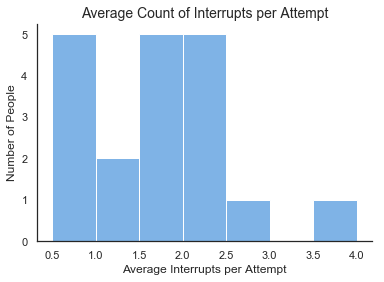

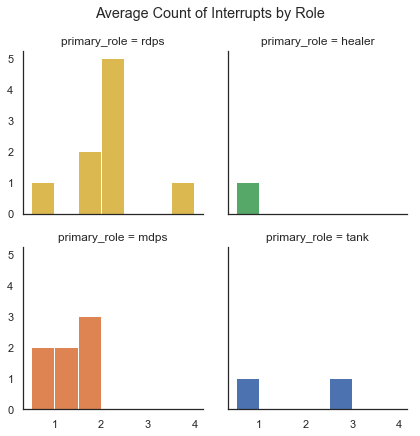

Mean is 1.695530 per attempt.
Median is 1.714286 per attempt.
Max attempts by player is 11.


In [94]:
la.collect_stats(data=champion_interrupts, master_list=master_list, player_list=player_list, 
                 boss_name='Champion of the Light', boss_id=2265, spell_name='Interrupts', 
                 analysis_columns=['count'], min_attempts=1, least=False, bins=bins)

<a id='jadefire'></a>
## Jadefire Masters

<a id='jf_interrupts'></a>
### Interrupts

In [96]:
jadefire_interrupts = pd.DataFrame([], columns=['log_id', 'spell_id', 'player', 'count'])

for spell_id in interrupt_ids:
    try:
        print('Spell Id:', spell_id)
        spell_df = wl.cast_count(api_key, master_list, spell_id, boss_id=2265)
        jadefire_interrupts = pd.concat([jadefire_interrupts, spell_df])
    except:
        continue

Spell Id: 2139
Player added: Petroll
Player added: Metönymy
Player added: Metönymy
Player added: Petroll
Player added: Tawn
Player added: Petroll
Player added: Metönymy
Player added: Petroll
Player added: Tawn
Player added: Metönymy
Player added: Metönymy
Player added: Petroll
Player added: Tawn
Player added: Petroll
Player added: Metönymy
Player added: Metönymy
Player added: Petroll
Player added: Petroll
Player added: Tawn
Player added: Metönymy
Player added: Metönymy
Player added: Petroll
Spell Id: 78675
Player added: Psychodruid
Player added: Soome
Player added: Psychodruid
Player added: Soome
Player added: Psychodruid
Player added: Psychodruid
Player added: Soome
Player added: Psychodruid
Player added: Soome
Player added: Psychodruid
Spell Id: 106839
Player added: Earrl
Player added: Earrl
Player added: Earrl
Player added: Earrl
Player added: Earrl
Spell Id: 6552
Player added: Elzam
Player added: Elzam
Player added: Velryssa
Player added: Elzam
Player added: Elzam
Player added: Vel

Player added: Ethelbeavers
Player added: Divanance
Player added: Divanance
Player added: Ethelbeavers
Player added: Ethelbeavers
Player added: Atalya
Spell Id: 15487
Player added: Stradivarus
Player added: Stradivarus
Player added: Stradivarus


In [99]:
bins = np.arange(0, 0.9, 0.1)

         player  count  fight_count primary_role  av_count
3     Divinance     32           40         tank  0.800000
11      Petroll     25           40         rdps  0.625000
18        Toyqt     19           31         mdps  0.612903
16       Tahvee     16           27         rdps  0.592593
10     Metönymy     22           40         rdps  0.550000
19       Valmet     21           40         mdps  0.525000
17         Tawn     19           37         rdps  0.513514
1        Ayriea     17           37         rdps  0.459459
2       Brianjr     14           34         mdps  0.411765
12  Psychodruid     11           29         rdps  0.379310
5         Elzam     12           32         mdps  0.375000
4         Earrl     10           40         tank  0.250000
8     Irvaeryss      8           34         mdps  0.235294
7     Illestrae      5           40       healer  0.125000
14  Stradivarus      3           32         rdps  0.093750


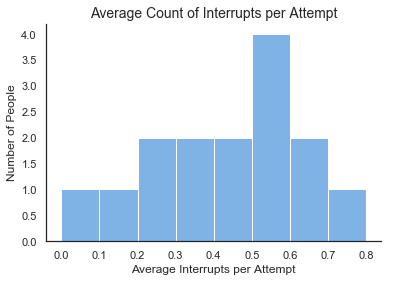

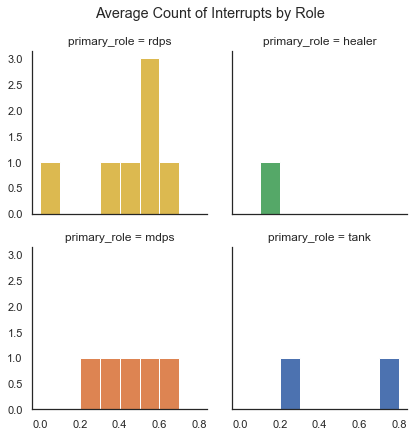

Mean is 0.436573 per attempt.
Median is 0.459459 per attempt.
Max attempts by player is 40.


In [100]:
la.collect_stats(data=jadefire_interrupts, master_list=master_list, player_list=player_list, 
                 boss_name='Jadefire Masters', boss_id=2266, spell_name='Interrupts', 
                 analysis_columns=['count'], min_attempts=15, least=False, bins=bins)